## 📚 1. Importar Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler


## 🔄 2. Carregar Dados

In [2]:
df = pd.read_csv('diabetes.csv')

## 📄 3. Extrair Informações Básicas do Dataset

In [3]:
# primeiras linhas do dataset
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# estatísticas do dataset
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 🧹 4. Preparação Rápida dos Dados (Remover Dados Nulos e Duplicados)

In [6]:
# ver se há valores nulos
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# ver se há valores duplicados
df.duplicated().sum()

23899

In [8]:
# ver valores únicos de cada categoria da variável Diabetes_012
initial_counts = df["Diabetes_012"].value_counts()
print("Initial counts of target variable classes:")
print(initial_counts)

# remover duplicados
df_cleaned = df.drop_duplicates()

# ver a distribuição das classes após a eliminação dos duplicados
cleaned_counts = df_cleaned["Diabetes_012"].value_counts()
print("\nCounts of target variable classes after removing duplicates:")
print(cleaned_counts)

# numero de duplicados removidos de cada classe
removed_counts = initial_counts - cleaned_counts
print("\nNumber of duplicates removed per class:")
print(removed_counts)

Initial counts of target variable classes:
0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

Counts of target variable classes after removing duplicates:
0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

Number of duplicates removed per class:
0.0    23648
2.0      249
1.0        2
Name: Diabetes_012, dtype: int64


## 🔍 5. Análise das Variáveis

In [9]:
def analyze_variable_types(df):
    variable_types = {
        "binary": [],  # 0 ou 1
        "categorical": [],  # categoricas discretas
        "continuous": [],  # numericas continuas
    }

    # analisar cada coluna 
    for column in df.columns:

        unique_values = df[column].dropna().unique() # eliminar valores nulos

        if set(unique_values).issubset({0, 1, 0.0, 1.0}):
            variable_types["binary"].append(column)

        elif df[column].dtype in ["int64", "float64"] and len(unique_values) > 3:
            variable_types["continuous"].append(column)

        else:
            variable_types["categorical"].append(column)

    # output para cada tipo de variável
    print(f"\nNumber of binary variables: {len(variable_types['binary'])}")
    print(f"Number of categorical variables: {len(variable_types['categorical'])}")
    print(f"Number of continuous variables: {len(variable_types['continuous'])}")

    return variable_types


variable_types = analyze_variable_types(df)

print("\nBinary Variables:")
print(variable_types["binary"])
print("\nCategorical Variables:")
print(variable_types["categorical"])
print("\nContinuous Variables:")
print(variable_types["continuous"])


Number of binary variables: 14
Number of categorical variables: 1
Number of continuous variables: 7

Binary Variables:
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

Categorical Variables:
['Diabetes_012']

Continuous Variables:
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [10]:
# separar as características (x) e o alvo (y)
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)

## 📏 6. Normalizar os Dados

In [11]:
import joblib

# normalizar as variáveis contínuas com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = X.copy()

X_scaled[variable_types["continuous"]] = scaler.fit_transform(
    X[variable_types["continuous"]]
)

joblib.dump(scaler, "scaler.pkl")

X_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571


In [12]:
# print valores únicos para cada coluna
for column in X.columns:
    print(X[column].value_counts())

0.0    144851
1.0    108829
Name: HighBP, dtype: int64
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
1.0    160898
0.0     92782
Name: Fruits, dtype: int64
1.0    205841
0.0     47839
Name: Veggies, dtype: int64
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64
1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64
0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: GenHlth, dtype: int64
0.0     

In [13]:
# print valores únicos para cada coluna após a normalização
for column in X_scaled.columns:
    print(X_scaled[column].value_counts())

0.0    144851
1.0    108829
Name: HighBP, dtype: int64
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
0.174419    24606
0.162791    20562
0.139535    19550
0.151163    17146
0.186047    16545
            ...  
0.848837        1
0.918605        1
0.860465        1
0.906977        1
0.767442        1
Name: BMI, Length: 84, dtype: int64
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
1.0    160898
0.0     92782
Name: Fruits, dtype: int64
1.0    205841
0.0     47839
Name: Veggies, dtype: int64
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64
1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64
0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64
0.25    89084
0.50    75646
0.00    45299
0.75    31570
1

## 🎯 7. Selecionar as Variáveis Mais Importantes

In [14]:
# seleção das variáveis mais importantes com SelectKBest e Chi-Square
# seleciona as 14 características mais importantes
select = SelectKBest(score_func=chi2, k=14)
select.fit_transform(X_scaled, y)

# obter as características selecionadas
selected_columns = select.get_support(indices=True)
important_features = X_scaled.columns[selected_columns].tolist()

# print todas as características, as características importantes e as características não importantes
print("\nAll Features:")
print(list(X_scaled.columns))

print("\nImportant Features:")
print(important_features)

print("\nUnwanted Features:")
print(list(set(X_scaled.columns) - set(important_features)))


All Features:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Important Features:
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']

Unwanted Features:
['Fruits', 'Sex', 'NoDocbcCost', 'Veggies', 'Education', 'CholCheck', 'AnyHealthcare']


In [15]:
# cria um novo dataframe com as características selecionadas
X_selected = X_scaled[important_features]

X_selected.head()

# guardar as características importantes selecionadas 
joblib.dump(important_features, "important_features.pkl")

print(important_features)

['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']


In [16]:
# print numero de variaveis de cada categoria
variable_types = analyze_variable_types(X_selected)


Number of binary variables: 8
Number of categorical variables: 0
Number of continuous variables: 6


In [17]:
for column in X_selected[variable_types["continuous"]]:
    print(X_selected[column].value_counts())

0.174419    24606
0.162791    20562
0.139535    19550
0.151163    17146
0.186047    16545
            ...  
0.848837        1
0.918605        1
0.860465        1
0.906977        1
0.767442        1
Name: BMI, Length: 84, dtype: int64
0.25    89084
0.50    75646
0.00    45299
0.75    31570
1.00    12081
Name: GenHlth, dtype: int64
0.000000    175680
0.066667     13054
1.000000     12088
0.166667      9030
0.033333      8538
0.100000      7381
0.333333      6373
0.500000      5505
0.133333      3789
0.666667      3364
0.233333      3100
0.833333      1188
0.466667      1167
0.200000       988
0.266667       639
0.400000       398
0.933333       327
0.700000       227
0.966667       158
0.600000        97
0.300000        91
0.533333        88
0.900000        79
0.733333        63
0.566667        54
0.866667        45
0.366667        41
0.433333        41
0.766667        38
0.800000        33
0.633333        16
Name: MentHlth, dtype: int64
0.000000    160052
1.000000     19400
0.066667    

In [18]:
for column in X_selected[variable_types["binary"]]:
    print(X_selected[column].value_counts())

0.0    144851
1.0    108829
Name: HighBP, dtype: int64
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64
0.0    211005
1.0     42675
Name: DiffWalk, dtype: int64


## 🔀 8. Verificar se podemos juntar diabetes com pré-diabetes
### Passar de 3 classes (0, 1, 2) para 2 classes (0, 1)

In [19]:
X_selected.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income
0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.00,0.6,0.5,1.0,0.666667,0.285714
1,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.50,0.0,0.0,0.0,0.500000,0.000000
2,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,0.666667,1.000000
3,1.0,0.0,0.174419,0.0,0.0,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0.833333,0.714286
4,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,0.0,0.25,0.1,0.0,0.0,0.833333,0.428571


In [20]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

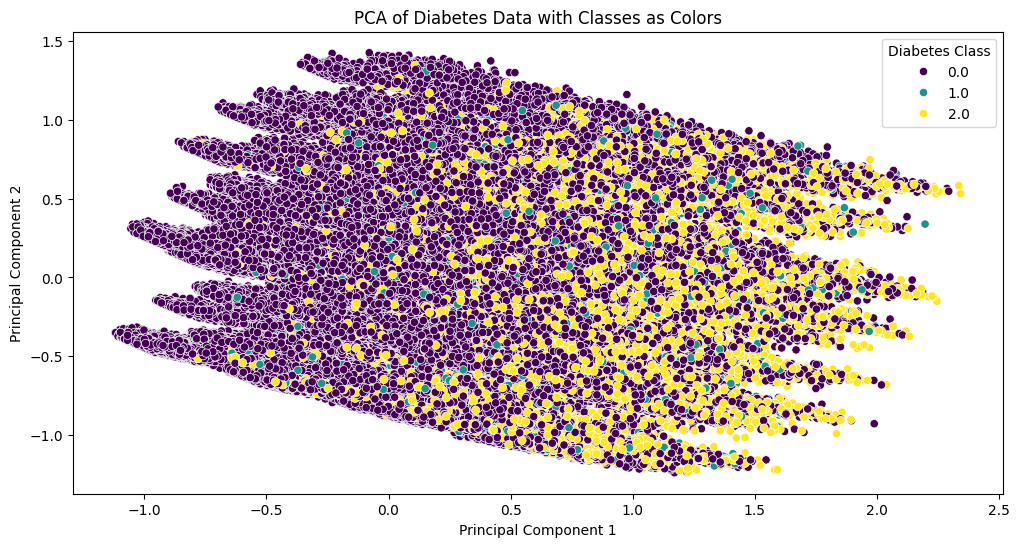

In [21]:
# aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# criar um dataframe com os resultados do PCA
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca["Diabetes_012"] = y  # Include target variable for analysis

# plot dos resultados do PCA com as classes de diabetes
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Diabetes_012",
    data=df_pca,
    palette='viridis'
)
plt.title("PCA of Diabetes Data with Classes as Colors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Diabetes Class")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/mtad2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


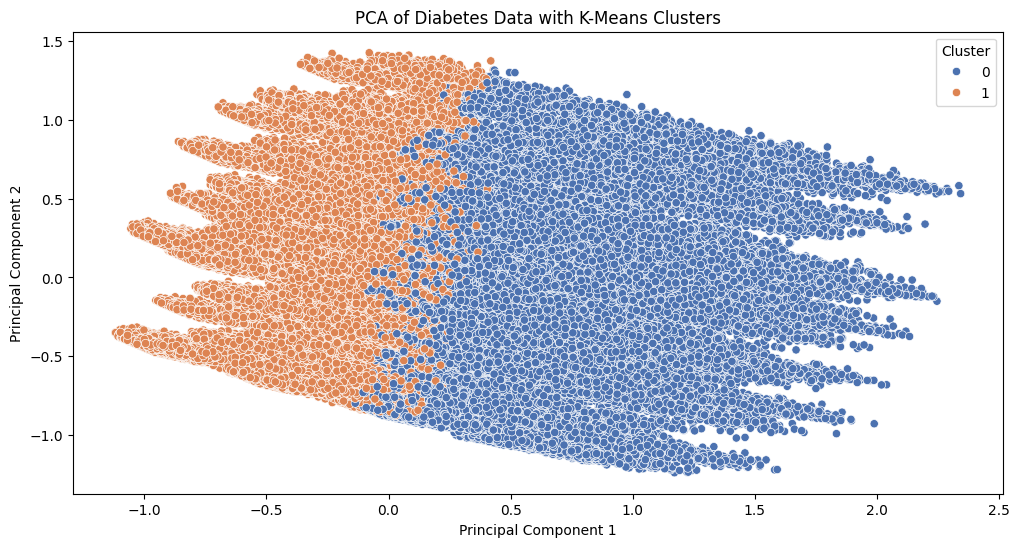

In [22]:
# aplicar k-means nos dados transformados pelo PCA
kmeans = KMeans(n_clusters=2, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(X_pca)

# plot resultados do PCA com k-means
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette="deep")
plt.title("PCA of Diabetes Data with K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## 0️⃣ 1️⃣ 9. Juntar as Classes 1 e 2

In [23]:
# juntar x_selected e y num único dataframe
df_selected = X_selected.copy()
df_selected['Diabetes_012'] = y

# converter valor 2 da Diabetes_012 alvo para 1
df_selected['Diabetes_binary'] = df_selected['Diabetes_012'].replace(2, 1)

# eliminar a variável alvo original
df_selected.drop('Diabetes_012', axis=1, inplace=True)

# save to csv
df_selected.to_csv('diabetes_normalizado.csv', index=False)

# separar as características (x) e o alvo (y)
y = df_selected['Diabetes_binary']
X = df_selected.drop('Diabetes_binary', axis=1)

In [24]:
y.value_counts()

0.0    213703
1.0     39977
Name: Diabetes_binary, dtype: int64

In [25]:
X.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income
0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.00,0.6,0.5,1.0,0.666667,0.285714
1,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.50,0.0,0.0,0.0,0.500000,0.000000
2,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,0.666667,1.000000
3,1.0,0.0,0.174419,0.0,0.0,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0.833333,0.714286
4,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,0.0,0.25,0.1,0.0,0.0,0.833333,0.428571


In [26]:
# print das número de valores para cada característica binária em X
variable_types = analyze_variable_types(X)
for column in X[variable_types["binary"]]:
    print(X[column].value_counts())


Number of binary variables: 8
Number of categorical variables: 0
Number of continuous variables: 6
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64
0.0    211005
1.0     42675
Name: DiffWalk, dtype: int64


## ⚖️ 10. Técnicas de Balanceamento de Classes

In [27]:
# identificar os índices das características binárias e contínuas
binary_feature_indices = [
    i for i, col in enumerate(X.columns) if set(X[col].unique()).issubset({0, 1})
]
continuous_feature_indices = [
    i for i in range(X.shape[1]) if i not in binary_feature_indices
]

# calcular racio 
target_ratio = 2.0
n_minority = len(y[y == 1])
target_majority = int(n_minority * target_ratio)

# criar pipeline com RandomUnderSampler e SMOTENC
sampler = Pipeline(
    [
        # Under-sample da classe maioritária com RandomUnderSampler 
        (
            "undersampler",
            RandomUnderSampler(sampling_strategy={0: target_majority}, random_state=42),
        ),
        # Over-sample da classe minoritária com SMOTENC
        (
            "oversampler",
            SMOTENC(
                categorical_features=binary_feature_indices,
                sampling_strategy={1: int(n_minority * 1.5)},
                random_state=42,
            ),
        ),
    ]
)

# aplicar o pipeline
X_sampled, y_sampled = sampler.fit_resample(X, y)

# ver nova distribuição das classes
print("Class distribution after resampling:")
print(y_sampled.value_counts())

# ver nova distribuição das características binárias após resampling
print("\nBinary feature distributions after resampling:")
for index in binary_feature_indices:
    col_name = X.columns[index]
    print(f"{col_name}: {X_sampled[col_name].value_counts().to_dict()}")

Class distribution after resampling:
0.0    79954
1.0    59965
Name: Diabetes_binary, dtype: int64

Binary feature distributions after resampling:
HighBP: {1.0: 74001, 0.0: 65918}
HighChol: {1.0: 70249, 0.0: 69670}
Smoker: {0.0: 74475, 1.0: 65444}
Stroke: {0.0: 132366, 1.0: 7553}
HeartDiseaseorAttack: {0.0: 121594, 1.0: 18325}
PhysActivity: {1.0: 100458, 0.0: 39461}
HvyAlcoholConsump: {0.0: 133669, 1.0: 6250}
DiffWalk: {0.0: 107617, 1.0: 32302}


In [28]:
# print das características binárias 
variable_types = analyze_variable_types(X_sampled)

for column in X_sampled[variable_types["binary"]]:
    print(X_sampled[column].value_counts())


Number of binary variables: 8
Number of categorical variables: 0
Number of continuous variables: 6
1.0    74001
0.0    65918
Name: HighBP, dtype: int64
1.0    70249
0.0    69670
Name: HighChol, dtype: int64
0.0    74475
1.0    65444
Name: Smoker, dtype: int64
0.0    132366
1.0      7553
Name: Stroke, dtype: int64
0.0    121594
1.0     18325
Name: HeartDiseaseorAttack, dtype: int64
1.0    100458
0.0     39461
Name: PhysActivity, dtype: int64
0.0    133669
1.0      6250
Name: HvyAlcoholConsump, dtype: int64
0.0    107617
1.0     32302
Name: DiffWalk, dtype: int64


In [29]:
X_sampled.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income
0,0.0,0.0,0.139535,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.500000,1.0,0.666667,0.571429
1,1.0,0.0,0.232558,1.0,0.0,0.0,1.0,0.0,0.50,0.000000,0.000000,0.0,0.583333,1.000000
2,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,0.50,0.033333,0.000000,0.0,0.666667,0.714286
3,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.666667,1.000000
4,0.0,0.0,0.267442,0.0,0.0,0.0,0.0,0.0,0.50,0.333333,0.066667,0.0,0.416667,1.000000


## ✂️ 11. Split dos dados em treino e teste

In [30]:
# split dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [31]:
# guardar os dados em ficheiros csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)